In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../Web-Scraping-Player-Details/cleaned_player_details_data/combined_dataset.csv", index_col=False)
df.head()

,Player,Position,Weight,Team,Nationality,Game_Year,Region,Selection_Type,Height_Feet,Height_Inch,Height_In_Inches,NBA_Draft_Year,NBA_Draft_Round,NBA_Draft_Pick
0,Tiny Archibald,PG,150,Boston Celtics,United States,1980,East,Coaches,6,1,73,1970,2,2
1,Larry Bird,SF,220,Boston Celtics,United States,1980,East,Coaches,6,9,81,1978,1,6
2,Bill Cartwright,C,245,New York Knicks,United States,1980,East,Coaches,7,1,85,1979,1,3
3,Dave Cowens,FC,230,Boston Celtics,United States,1980,East,Coaches,6,9,81,1970,1,4
4,John Drew,GF,205,Atlanta Hawks,United States,1980,East,Fans,6,6,78,1974,2,7


In [8]:
# Creating subsets of dataframe to create the NBA Divisions
Atlantic_Div = df.loc[df['Team'].isin(["Boston Celtics", "Philadelphia 76ers", "New York Knicks", "Toronto Raptors", "Brooklyn Nets"])]
Central_Div = df.loc[df['Team'].isin(["Indiana Pacers", "Milwaukee Bucks", "Detriot Pistons", "Chicago Bulls", "Cleveland Cavaliers"])]
Southeast_Div = df.loc[df['Team'].isin(["Orlando Magic", "Charlotte Hornets", "Washington Wizards", "Miami Heat", "Atlanta Hawks"])]
Northwest_Div = df.loc[df['Team'].isin(["Denver Nuggets", "Oklahoma City Thunder", "Minnesota Timberwolves", "Utah Jazz", "Portland Trail Blazers"])]
Pacific_Div = df.loc[df['Team'].isin(["Phoenix Suns", "Golden State Warriors", "Los Angeles Lakers", "Los Angeles Clippers", "Sacremento Kings"])]
Southwest_Div = df.loc[df['Team'].isin(["Dallas Mavericks", "New Orleans Pelicans", "San Antonio Spurs", "Houston Rockets", "Memphis Grizzlies"])]

In [54]:
# Creating subsets of players by Game_Year
Game_1980s = df[df['Game_Year'].between(1980,1989)]
Game_1990s = df[df['Game_Year'].between(1990,1999)]
Game_2000s = df[df['Game_Year'].between(2000,2010)]

In [55]:
Game_1980s.tail()

,Player,Position,Weight,Team,Nationality,Game_Year,Region,Selection_Type,Height_Feet,Height_Inch,Height_In_Inches,NBA_Draft_Year,NBA_Draft_Round,NBA_Draft_Pick
239,Kevin McHale,PF,210,Boston Celtics,United States,1989,East,Coaches,6,10,82,1980.0,1.0,3.0
240,Larry Nance,PF,205,Cleveland Cavaliers,United States,1989,East,Coaches,6,10,82,1981.0,1.0,20.0
241,Mark Price,PG,170,Cleveland Cavaliers,United States,1989,East,Coaches,6,0,72,1986.0,2.0,1.0
242,Isiah Thomas,PG,180,Detroit Pistons,United States,1989,East,Fans,6,1,73,1981.0,1.0,2.0
243,Dominique Wilkins,SF,200,Atlanta Hawks,United States,1989,East,Fans,6,7,79,1982.0,1.0,3.0


In [10]:
df['NBA_Draft_Year'] = pd.to_numeric(df['NBA_Draft_Year'], errors='coerce')
df['NBA_Draft_Round'] = pd.to_numeric(df['NBA_Draft_Round'], errors='coerce')
df['NBA_Draft_Pick'] = pd.to_numeric(df['NBA_Draft_Pick'], errors='coerce')


In [11]:
# Find duplicates
df.duplicated().sum()

0

In [12]:
# Find null values
df.isnull().sum()
# Nulls in NBA Draft columns since some players were not drafted

Player               0
Position             0
Weight               0
Team                 0
Nationality          0
Game_Year            0
Region               0
Selection_Type       0
Height_Feet          0
Height_Inch          0
Height_In_Inches     0
NBA_Draft_Year      17
NBA_Draft_Round     17
NBA_Draft_Pick      17
dtype: int64

In [13]:
# Look at general information of the dataframe
print("number of rows:", len(df.index))
print("number of col:",  len(df.columns))
print("keys:",  df.keys(),type(df.keys()))
print("info",df.info() )
print("head", df.head())
print("TYPES", df.dtypes)

number of rows: 761
number of col: 14
keys: Index(['Player', 'Position', 'Weight', 'Team', 'Nationality', 'Game_Year',
       'Region', 'Selection_Type', 'Height_Feet', 'Height_Inch',
       'Height_In_Inches', 'NBA_Draft_Year', 'NBA_Draft_Round',
       'NBA_Draft_Pick'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            761 non-null    object 
 1   Position          761 non-null    object 
 2   Weight            761 non-null    int64  
 3   Team              761 non-null    object 
 4   Nationality       761 non-null    object 
 5   Game_Year         761 non-null    int64  
 6   Region            761 non-null    object 
 7   Selection_Type    761 non-null    object 
 8   Height_Feet       761 non-null    int64  
 9   Height_Inch       761 non-null    in

In [14]:
# Look at statitics of numerical columns
df.describe()

,Weight,Game_Year,Height_Feet,Height_Inch,Height_In_Inches,NBA_Draft_Year,NBA_Draft_Round,NBA_Draft_Pick
count,761.000000,761.000000,761.000000,761.000000,761.000000,744.000000,744.000000,744.000000
mean,221.224704,1995.110381,6.153745,5.729304,79.574244,1988.057796,1.153226,7.000000
std,32.292711,9.053404,0.375240,3.527381,3.843322,9.090876,0.594425,6.086855
min,150.000000,1980.000000,5.000000,0.000000,70.000000,1968.000000,1.000000,1.000000
25%,200.000000,1987.000000,6.000000,3.000000,77.000000,1981.000000,1.000000,2.000000
50%,220.000000,1995.000000,6.000000,6.000000,79.000000,1987.000000,1.000000,5.000000
75%,240.000000,2003.000000,6.000000,9.000000,82.000000,1996.000000,1.000000,10.000000
max,325.000000,2010.000000,7.000000,11.000000,90.000000,2008.000000,7.000000,30.000000


In [15]:
# Correlation matrices
print("PEARSON CORRELATION MATRIX:")
print(df.corr(method='pearson',numeric_only=True))

print("SPEARMAN CORRELATION MATRIX:")
print(df.corr(method='spearman',numeric_only=True))

PEARSON CORRELATION MATRIX:
                    Weight  Game_Year  Height_Feet  Height_Inch  \
Weight            1.000000   0.245904     0.516619     0.215885   
Game_Year         0.245904   1.000000    -0.023981     0.071434   
Height_Feet       0.516619  -0.023981     1.000000    -0.564969   
Height_Inch       0.215885   0.071434    -0.564969     1.000000   
Height_In_Inches  0.803415   0.037466     0.653086     0.255871   
NBA_Draft_Year    0.236152   0.928056    -0.077755     0.118008   
NBA_Draft_Round  -0.062224  -0.223340     0.080496    -0.064995   
NBA_Draft_Pick   -0.199267   0.038397    -0.235613     0.080879   

                  Height_In_Inches  NBA_Draft_Year  NBA_Draft_Round  \
Weight                    0.803415        0.236152        -0.062224   
Game_Year                 0.037466        0.928056        -0.223340   
Height_Feet               0.653086       -0.077755         0.080496   
Height_Inch               0.255871        0.118008        -0.064995   
Height_In_Inc

In [16]:
# Variety of nationalities by region
pd.crosstab(df['Nationality'], df['Region'])

Region,East,West
Nationality,,
Argentina,0,1
Canada,1,0
Canada South Africa,0,7
China,0,7
Democratic Republic of the Congo,5,3
Dominican Republic United States,1,0
England,0,1
France,0,3
Germany,0,9


In [17]:
# Variety of player selection type by region
pd.crosstab(df['Selection_Type'], df['Region'])

Region,East,West
Selection_Type,,
Coaches,212,211
Fans,150,150
Replacement,19,19


In [18]:
# Player selection type by team
pd.crosstab(df['Team'], df['Selection_Type'])

Selection_Type,Coaches,Fans,Replacement
Team,,,
Atlanta Hawks,19,9,3
Boston Celtics,35,15,2
Charlotte Hornets,7,2,1
Chicago Bulls,4,21,1
Cleveland Cavaliers,17,7,1
Dallas Mavericks,20,1,4
Denver Nuggets,13,8,3
Detroit Pistons,24,19,3
Golden State Warriors,11,3,0


In [19]:
# Player position and team
pd.crosstab(df['Team'], df['Position'])

Position,C,F,FC,G,GF,PF,PG,SF,SG
Team,,,,,,,,,
Atlanta Hawks,6,1,1,3,1,4,1,9,5
Boston Celtics,9,3,1,1,0,10,5,21,2
Charlotte Hornets,2,3,0,1,1,0,0,3,0
Chicago Bulls,2,0,0,1,2,1,1,7,12
Cleveland Cavaliers,8,7,0,1,0,3,6,0,0
Dallas Mavericks,1,0,0,6,3,10,2,3,0
Denver Nuggets,3,5,0,4,0,0,2,10,0
Detroit Pistons,4,0,6,4,0,2,12,9,9
Golden State Warriors,0,0,1,0,0,0,4,6,3


In [20]:
# Player position by region
pd.crosstab(df['Region'], df['Position'])

Position,C,F,FC,G,GF,PF,PG,SF,SG
Region,,,,,,,,,
East,73,18,21,31,13,42,48,79,56
West,76,17,30,42,26,59,47,38,45


In [21]:
# Which teams played which years
pd.crosstab(df['Team'], df['Game_Year'])

Game_Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Team,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,3,2,1,0,0,0,1,1,2,2,...,1,1,0,0,0,0,1,1,1,2
Boston Celtics,3,3,3,2,3,3,3,3,3,1,...,0,2,2,1,1,1,0,3,3,3
Charlotte Hornets,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Chicago Bulls,0,2,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Cleveland Cavaliers,0,1,0,0,0,0,0,0,1,3,...,0,0,1,0,2,1,1,1,2,1
Dallas Mavericks,0,0,0,0,1,1,1,2,2,0,...,1,2,2,1,1,1,2,1,1,2
Denver Nuggets,0,0,1,2,2,2,1,1,2,1,...,1,0,0,0,0,0,2,2,1,2
Detroit Pistons,0,0,2,2,3,2,1,2,1,1,...,1,0,1,1,1,4,2,3,1,0
Golden State Warriors,0,0,1,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Frequency of each player in NBA All Star games, show top 5 players
df['Player'].value_counts()

Player
Shaquille O'Neal      15
Michael Jordan        14
Karl Malone           14
Kevin Garnett         13
Magic Johnson         12
                      ..
Calvin Natt            1
Christian Laettner     1
Joe Barry Carroll      1
Juwan Howard           1
Gerald Wallace         1
Name: count, Length: 215, dtype: int64

In [23]:
# Frequency of position
df['Position'].value_counts()

Position
C     149
SF    117
PF    101
SG    101
PG     95
G      73
FC     51
GF     39
F      35
Name: count, dtype: int64

In [24]:
# Frequency of teams
df['Team'].value_counts()

Team
Los Angeles Lakers        58
Boston Celtics            52
Detroit Pistons           46
Phoenix Suns              43
San Antonio Spurs         39
Philadelphia Sixers       38
Seattle SuperSonics       37
Utah Jazz                 37
Houston Rockets           36
Atlanta Hawks             31
Chicago Bulls             26
Dallas Mavericks          25
Cleveland Cavaliers       25
New York Knicks           24
Denver Nuggets            24
Milwaukee Bucks           22
Portland Trail Blazers    21
Orlando Magic             20
Washington Wizards        19
New Jersey Nets           19
Miami Heat                17
Indiana Pacers            17
Sacramento Kings          15
Golden State Warriors     14
Minnesota Timberwolves    13
Toronto Raptors           11
Charlotte Hornets         10
New Orleans Hornets        8
Los Angeles Clippers       7
Kansas City Kings          3
Memphis Grizzlies          2
San Diego Clippers         1
Oklahoma City Thunder      1
Name: count, dtype: int64

In [61]:
# function to make mean lines in histograms
def mean(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

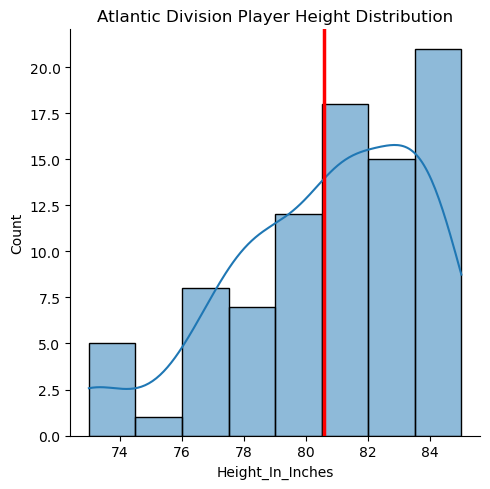

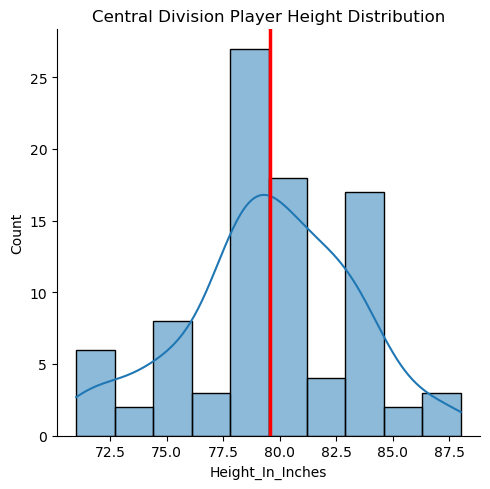

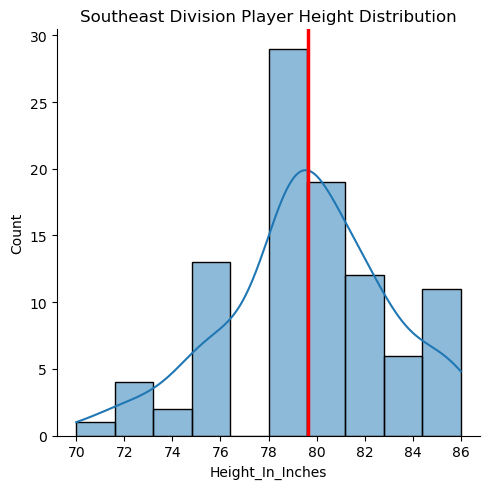

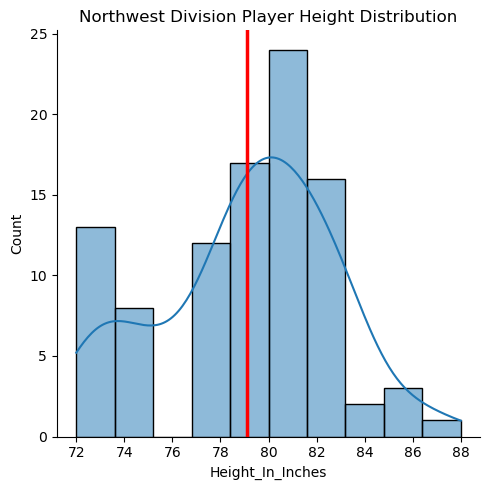

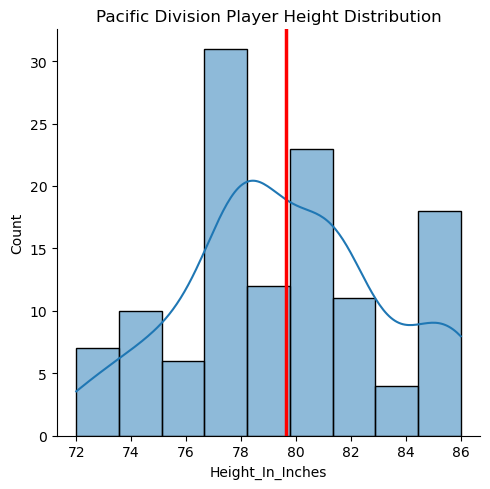

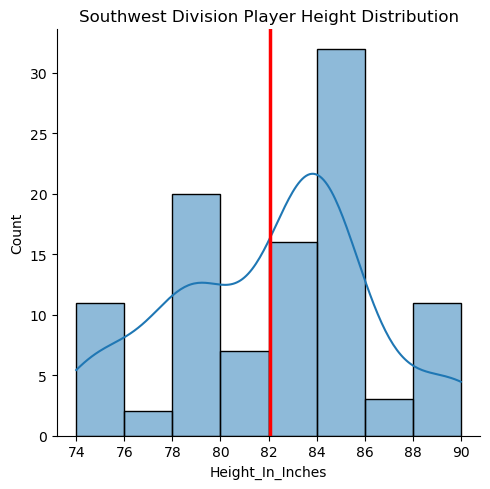

In [63]:
# Player height distribution by Division
a = sns.displot(data=Atlantic_Div, x="Height_In_Inches", kde=True).set(title='Atlantic Division Player Height Distribution', xlabel="Height In Inches")
a.map(mean, "Height_In_Inches")
plt.savefig("../Atlantic-Height.png")
plt.show

b = sns.displot(data=Central_Div, x="Height_In_Inches", kde=True).set(title='Central Division Player Height Distribution', xlabel="Height In Inches")
b.map(mean, "Height_In_Inches")
plt.savefig("../Central-Height.png")
plt.show

c = sns.displot(data=Southeast_Div, x="Height_In_Inches", kde=True).set(title='Southeast Division Player Height Distribution', xlabel="Height In Inches")
c.map(mean, "Height_In_Inches")
plt.savefig("../Southeast-Height.png")
plt.show

d = sns.displot(data=Northwest_Div, x="Height_In_Inches", kde=True).set(title='Northwest Division Player Height Distribution', xlabel="Height In Inches")
d.map(mean, "Height_In_Inches")
plt.savefig("../Northwest-Height.png")
plt.show

e = sns.displot(data=Pacific_Div, x="Height_In_Inches", kde=True).set(title='Pacific Division Player Height Distribution', xlabel="Height In Inches")
e.map(mean, "Height_In_Inches")
plt.savefig("../Pacific-Height.png")
plt.show

f = sns.displot(data=Southwest_Div, x="Height_In_Inches", kde=True).set(title='Southwest Division Player Height Distribution', xlabel="Height In Inches")
f.map(mean, "Height_In_Inches")
plt.savefig("../Southwest-Height.png")
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

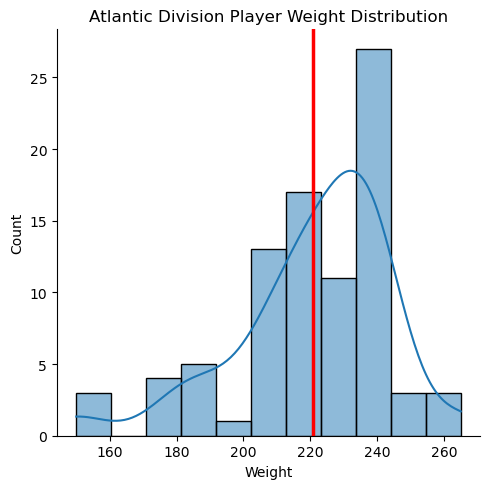

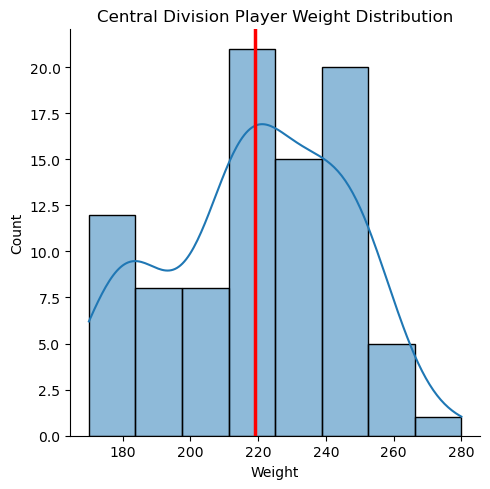

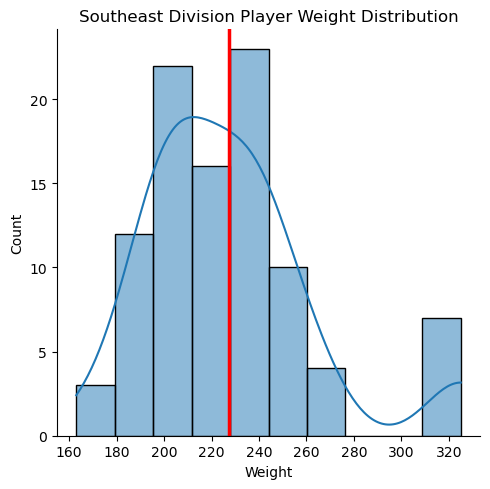

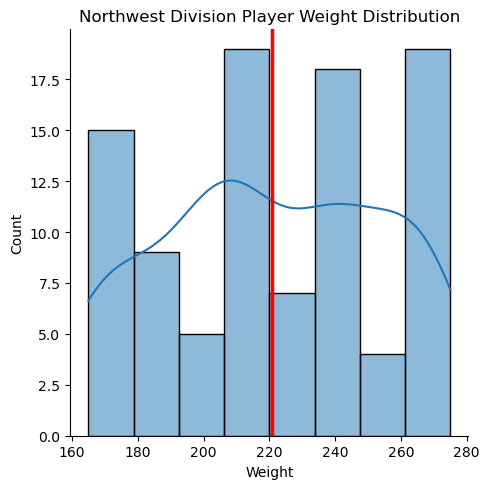

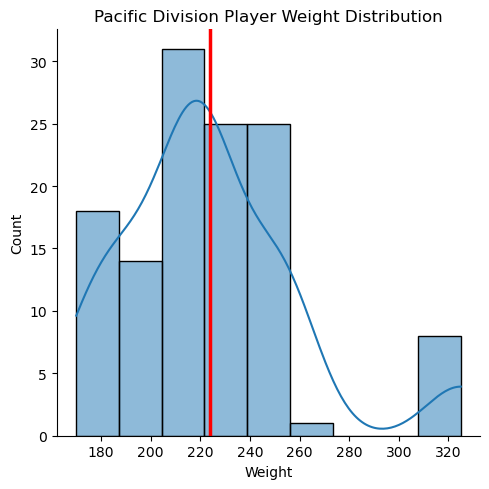

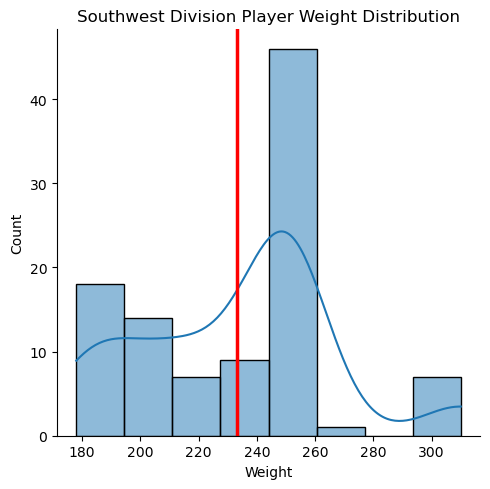

In [64]:
# Player weight distribution by Division
a1 = sns.displot(data=Atlantic_Div, x="Weight", kde=True).set(title='Atlantic Division Player Weight Distribution')
a1.map(mean, "Weight")
plt.savefig("../Atlantic-Weight.png")
plt.show

b1 = sns.displot(data=Central_Div, x="Weight", kde=True).set(title='Central Division Player Weight Distribution')
b1.map(mean, "Weight")
plt.savefig("../Central-Weight.png")
plt.show

c1 = sns.displot(data=Southeast_Div, x="Weight", kde=True).set(title='Southeast Division Player Weight Distribution')
c1.map(mean, "Weight")
plt.savefig("../Southeast-Weight.png")
plt.show

d1 = sns.displot(data=Northwest_Div, x="Weight", kde=True).set(title='Northwest Division Player Weight Distribution')
d1.map(mean, "Weight")
plt.savefig("../Northwest-Weight.png")
plt.show

e1 = sns.displot(data=Pacific_Div, x="Weight", kde=True).set(title='Pacific Division Player Weight Distribution')
e1.map(mean, "Weight")
plt.savefig("../Pacific-Weight.png")
plt.show

f1 = sns.displot(data=Southwest_Div, x="Weight", kde=True).set(title='Southwest Division Player Weight Distribution')
f1.map(mean, "Weight")
plt.savefig("../Southwest-Weight.png")
plt.show

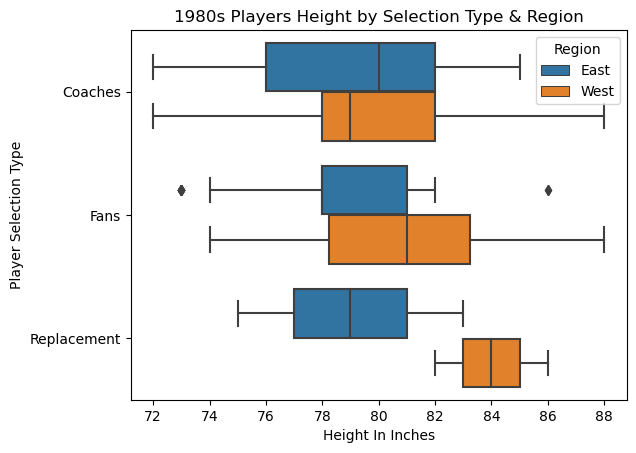

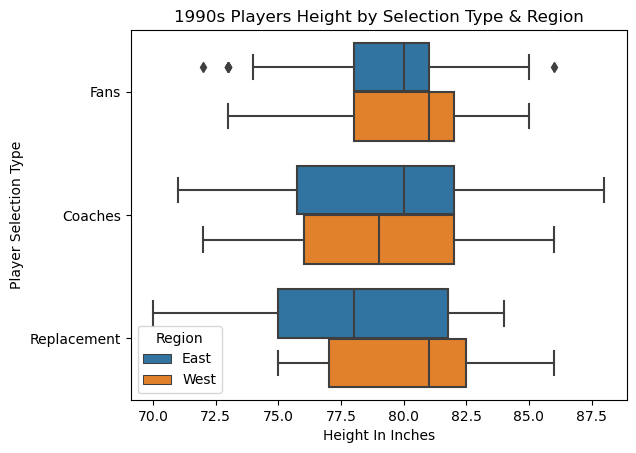

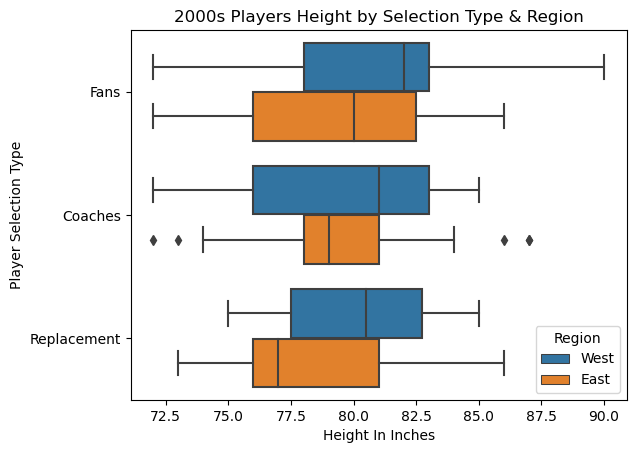

In [65]:
# Height distribution based on selection type 
sns.boxplot(data=Game_1980s, x="Height_In_Inches", y="Selection_Type", hue="Region").set(title='1980s Players Height by Selection Type & Region', xlabel="Height In Inches", ylabel="Player Selection Type")
plt.savefig("../1980s-Height-ST.png")
plt.show()

sns.boxplot(data=Game_1990s, x="Height_In_Inches", y="Selection_Type", hue="Region").set(title='1990s Players Height by Selection Type & Region', xlabel="Height In Inches", ylabel="Player Selection Type")
plt.savefig("../1990s-Height-ST.png")
plt.show()

sns.boxplot(data=Game_2000s, x="Height_In_Inches", y="Selection_Type", hue="Region").set(title='2000s Players Height by Selection Type & Region', xlabel="Height In Inches", ylabel="Player Selection Type")
plt.savefig("../2000s-Height-ST.png")
plt.show()

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.p

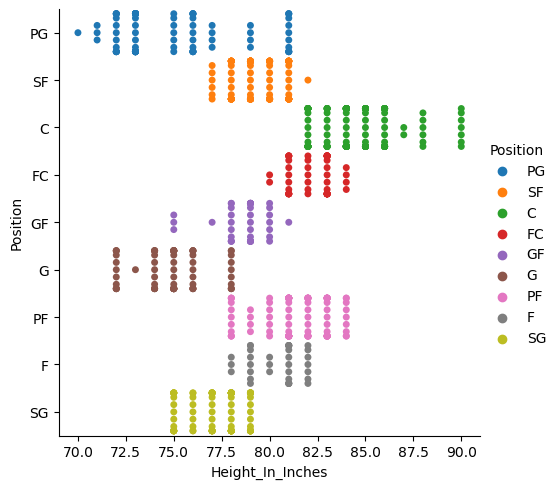

In [45]:
sns.catplot(data=df, x="Height_In_Inches", y="Position", kind="swarm", hue="Position")

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/categorical.p

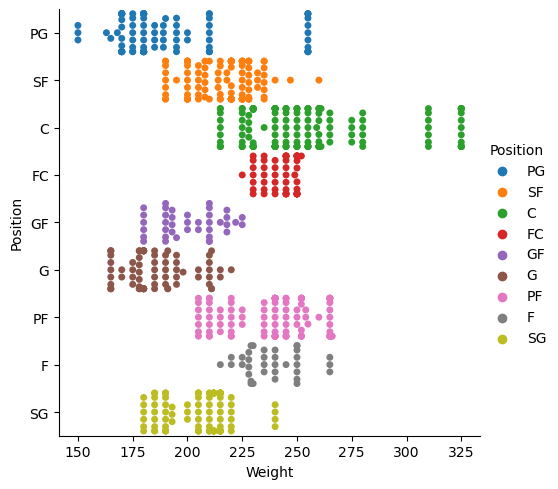

In [46]:
sns.catplot(data=df, x="Weight", y="Position", kind="swarm", hue="Position")

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


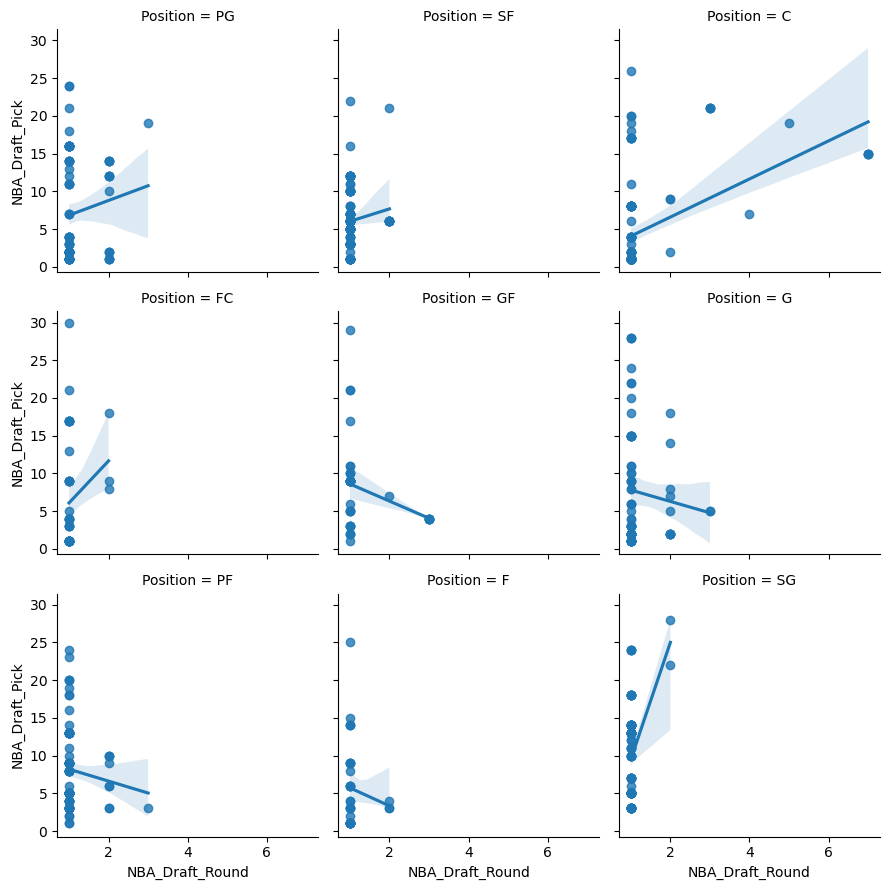

In [76]:
g = sns.FacetGrid(df, col="Position", col_wrap=3)
g.map(sns.regplot, "NBA_Draft_Round", "NBA_Draft_Pick")
plt.savefig("../EDA/Position-Draft.png")